# Kickstarter Analysis
Kickstarter, the crowdfunding platform, is thinking about providing a consulting service to project founders to help its customers create more successful crowdfunding campaigns. You’ve been asked to do some initial analysis. 

Import required packages for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import chi2_contingency
import seaborn as sns

Load and examine dataset.

In [2]:
df = pd.read_csv('DSI_kickstarterscrape_dataset.csv', engine='python')

In [3]:
df.head(10)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
5,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,"Wed, 22 Jun 2011 13:33:00 -0000",7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43
6,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Film & Video,Short Film,"Collegedale, TN",failed,1000.0,280.0,0.280000,8,"Sat, 18 Feb 2012 02:17:08 -0000",5,"$5,$10,$25,$50,$100",0,0,30.00
7,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,"Chicago, IL",successful,2000.0,2180.0,1.090000,46,"Fri, 30 Dec 2011 04:36:53 -0000",7,"$10,$20,$50,$100,$250,$500,$1,000",13,5,30.00
8,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",successful,1000.0,1125.0,1.125000,30,"Sun, 18 Apr 2010 04:59:00 -0000",12,"$5,$8,$10,$15,$20,$30,$50,$100,$120,$250,$500,...",10,1,67.53
9,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Art,Illustration,"Chicago, IL",successful,7500.0,9836.0,1.311527,255,"Tue, 01 Nov 2011 04:59:00 -0000",10,"$1,$20,$35,$50,$60,$100,$110,$500,$1,000,$1,500",6,5,35.29


In [4]:
df.location.unique()

array(['Columbia, MO', 'Maplewood, NJ', 'Los Angeles, CA', ...,
       'Osage, IA', 'Lake Oswego, OR', 'Celebration, FL'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


In [6]:
# number statuses
def what_status_code(df):
    if df.status == 'successful':
        return 2
    elif df.status == 'live':
        return 1
    elif df.status == 'canceled':
        return 0
    elif df.status == 'suspended':
        return -1
    elif df.status == 'failed':
        return -2

df['status_code'] = df.apply(what_status_code, axis=1)
display(df.head())

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,status_code
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,-2
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,1
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,-2


# Part 1: Foundational Data Analysis

#### Find the mean (total) pledge that projects get.

In [7]:
print('mean:', round(np.mean(df.pledged),2))

mean: 4980.75


#### Create a histogram that shows the distribution for number of backers.

In [8]:
print('min:', min(df.backers))
print('max:', max(df.backers))
print('sd:', np.std(df.backers))
print('mean:', np.mean(df.backers))
print('median:', np.median(df.backers))

min: 0
max: 87142
sd: 688.6209867190622
mean: 69.97319233196248
median: 23.0


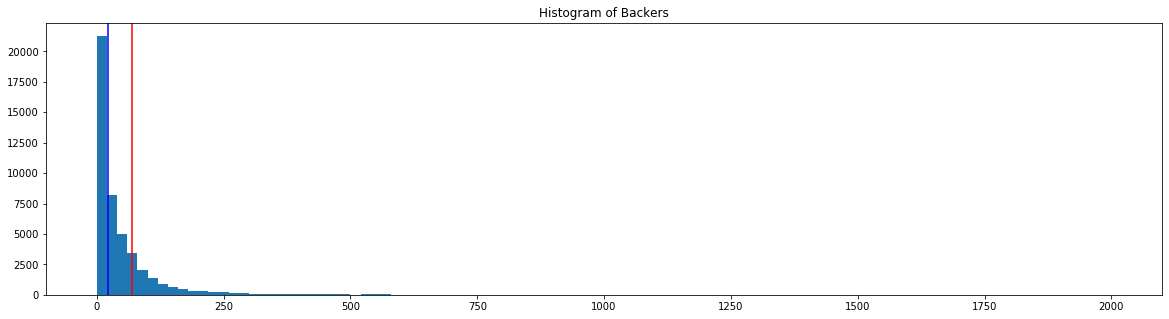

In [9]:
plt.figure(figsize=(20,5))
plt.hist(df.backers, bins=100, range = (0, 2000))
plt.axvline(df.backers.mean(), color='r', label='mean')
plt.axvline(df.backers.median(), color='b', label='median')
plt.title('Histogram of Backers')
plt.show()

We can see that the data is positively skewed.

#### Is the ‘duration’ variable normally distributed? *

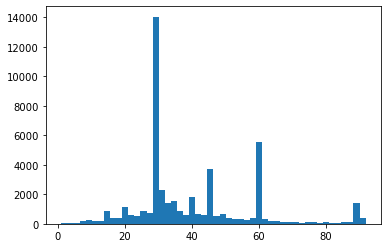

In [10]:
plt.hist(df.duration, bins=50)
plt.show()

The duration variable does not seem to follow a normal distribution.

# Part 2: Qualitative Analysis



-  What type of projects would be most successful at getting funded?
-  Is there an ideal month/day/time to launch a campaign?

In [11]:
by_category = df.groupby('category').pledged.sum().reset_index().sort_values(by='pledged', ascending=False)
display(by_category.head())

,category,pledged
6,Film &amp; Video,61994752.0
9,Music,40015262.0
3,Design,35338699.0
8,Games,26456608.0
11,Publishing,11441661.0


In [12]:
# category by backers
backers_by_cat = df.groupby('category').backers.sum().reset_index().sort_values(by='backers', ascending=False)
display(backers_by_cat.head())

,category,backers
6,Film &amp; Video,692744
9,Music,597937
8,Games,558602
3,Design,411212
11,Publishing,196306


In [13]:
by_location = df.groupby('location').pledged.sum().reset_index().sort_values(by='pledged', ascending=False)
display(by_location.head())

,location,pledged
2459,"Los Angeles, CA",22945474.0
3000,"New York, NY",20091379.0
3794,"San Francisco, CA",14705007.0
3279,"Palo Alto, CA",10988857.0
529,"Brooklyn, NY",9766671.0


In [14]:
print(len(by_location))

4849


In [15]:
status = df.status.unique()
status_code = [i for i in range(len(status))]
print(status)
print(status_code)
status_dict = {a:b for a,b in zip(status, status_code)}
print(status_dict)

['successful' 'failed' 'live' 'canceled' 'suspended']
[0, 1, 2, 3, 4]
{'successful': 0, 'failed': 1, 'live': 2, 'canceled': 3, 'suspended': 4}


In [16]:
df['status_code'] = df.status.map(status_dict)
display(df.head())

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,status_code
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,0
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,1
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,0
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,1


In [17]:
df1 = df.groupby(['location', 'status', 'status_code', 'goal']).pledged.sum().reset_index()
display(df1.head())
print(len(df1))

,location,status,status_code,goal,pledged
0,"1, LA",failed,1,11111.0,301.0
1,"1, LA",failed,1,25000.0,4480.0
2,"10, Middleburg, MD",failed,1,19500.0,103.0
3,"Aasiaat, Greenland",live,2,12000.0,7349.0
4,"Aberdeen, SD",failed,1,2000.0,0.0


23493


In [18]:
by_status = df.groupby('status').pledged.sum().reset_index()
display(by_status.head())

,status,pledged
0,canceled,119167.0
1,failed,17045848.0
2,live,13654533.0
3,successful,197961967.0
4,suspended,59029.0


#### What's the best length of time to run a campaign?

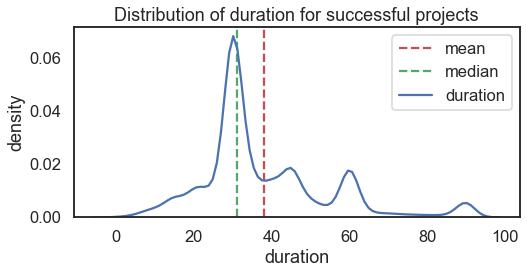

In [19]:
sc = df[df.status == 'successful']

plt.figure(figsize=(8,3.5))
sns.set()
sns.set_context('talk')
sns.set_style('white')
sns.despine()
plt.axvline(sc.duration.mean(), color = 'r', linestyle = '--', label = 'mean')
plt.axvline(sc.duration.median(), color = 'g', linestyle = '--', label = 'median')
sns.kdeplot(sc.duration)
plt.xlabel('duration')
plt.ylabel('density')
# plt.xticks(range(10,110,10))
plt.title('Distribution of duration for successful projects')
plt.show()

The best duration for successful projects is between 25 to 35 minutes.

#### What's the ideal pledge goal?

Plot a boxplot to visualize distribution of goals for each campaign status.

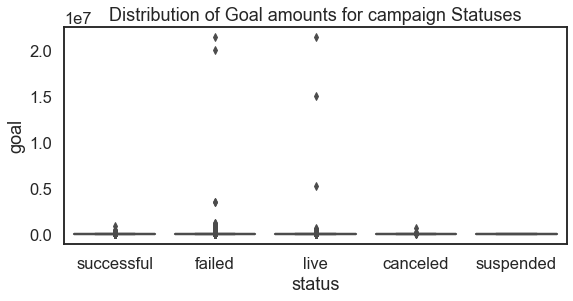

In [20]:
sns.set_context('talk')
plt.figure(figsize=(9,4))
sns.boxplot(data=df, x='status', y='goal')
plt.ylabel('goal')
plt.title('Distribution of Goal amounts for campaign Statuses')
plt.show()

Set a y-limit at around 20000 to compare distribution between successful campaigns and other statuses.

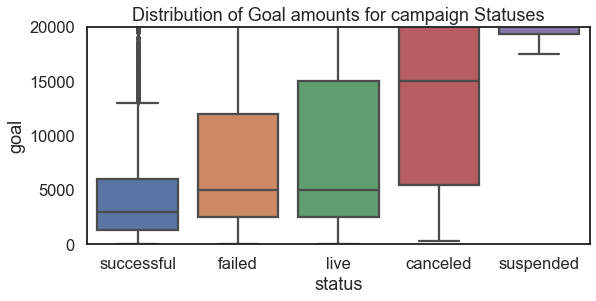

In [21]:
sns.set_context('talk')
plt.figure(figsize=(9,4))
sns.boxplot(data=df, x='status', y='goal')
plt.ylabel('goal')
plt.title('Distribution of Goal amounts for campaign Statuses')
plt.ylim(0, 20000)
plt.show()

The recommended pledge goal is between 1500 and 6000.

#### What type of projects would be most successful at getting funded?

Filter only successful and failed campaigns for analysis.

In [22]:
df_successful_failed = df[df.status.isin(['successful', 'failed'])]
df_successful_failed.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,status_code
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,0
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,1
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,0
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,1
5,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,"Wed, 22 Jun 2011 13:33:00 -0000",7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43,0


In [23]:
# pivot for both category and subcategory
success_rate = df_successful_failed.groupby(['category', 'subcategory', 'status']).name.count().reset_index()\
.rename(columns={'name': 'count'})

# convert to pivot
pivoted_success_rate = success_rate.pivot_table(\
                                          columns='status',
                                          index=['category','subcategory'],
                                          values='count').reset_index()

pivoted_success_rate['success_rate'] = 100.0*pivoted_success_rate.successful/(pivoted_success_rate.successful+pivoted_success_rate.failed)
pivoted_success_rate.sort_values(by='success_rate', ascending=False, inplace=True)
pivoted_success_rate.success_rate = pivoted_success_rate.success_rate.apply(lambda x: round(x, 2))
display(pivoted_success_rate.head(10))

status,category,subcategory,failed,successful,success_rate
35,Music,Country &amp; Folk,186,573,75.49
38,Music,Indie Rock,458,1358,74.78
10,Dance,Dance,180,527,74.54
33,Music,Classical Music,110,321,74.48
39,Music,Jazz,116,299,72.05
34,Music,Country & Folk,65,166,71.86
56,Theater,Theater,680,1642,70.71
19,Film & Video,Narrative Film,14,32,69.57
42,Music,Rock,512,1117,68.57
41,Music,Pop,234,457,66.14


Music, Dance and Theater has the highest success rates.

Let's look at the relationship between Music, Dance and Theater. Is the difference in success rates significant?

In [24]:
# group by category
success_rate_category = df_successful_failed.groupby(['category', 'status']).name.count().reset_index()\
.rename(columns={'name': 'count'})

# change to pivot
pivoted_success_rate_by_category = success_rate_category.pivot(\
                                                              columns='status',
                                                              index='category',
                                                              values='count').reset_index()

# add percentage success
pivoted_success_rate_by_category['success_rate'] = 100.0*pivoted_success_rate_by_category.successful/(pivoted_success_rate_by_category.successful + pivoted_success_rate_by_category.failed)
pivoted_success_rate_by_category.sort_values(by='success_rate', ascending=False, inplace=True)
pivoted_success_rate_by_category.success_rate = pivoted_success_rate_by_category.success_rate.apply(lambda x: round(x, 2))
display(pivoted_success_rate_by_category.head())

status,category,failed,successful,success_rate
2,Dance,180,527,74.54
13,Theater,680,1642,70.71
9,Music,3261,6792,67.56
0,Art,1585,2106,57.06
5,Film & Video,210,246,53.95


#### Is Dance more likely to be successful than Theater?

In [25]:
contingency_dt = [
    [180, 527],
    [680,1642]
]
chi2, pval_dt, dof, expected = chi2_contingency(contingency_dt)
print(pval_dt)

0.053921123689761014


Since p_value = 0.0539 > 0.05, do not reject null hypothesis.
No significant difference between success rate of Dance and Theater.

#### Is Dance more likely to be successful than Music?

In [26]:
contingency_dm = [
    [180, 527],
    [3261,6792]
]
chi2, pval_dm, dof, expected = chi2_contingency(contingency_dm)
print(pval_dm)

0.00014251116543804153


Since p_value = 0.0001 < 0.05, reject null hypothesis. There is a significant difference between success rate of Dance and Music.

#### Is Theater more likely to be successful than Music?

In [27]:
# How about theater and Music?
contingency_tm = [
    [680, 1642],
    [3261, 6792]
]
chi2, pval_tm, dof, expected = chi2_contingency(contingency_tm)
print(pval_tm)

0.0035608981669478946


Since p_value = 0.0036 < 0.05, reject null hypothesis. There is a significant difference between success rate of Theater and Music.

#### Is there an ideal month to launch a campaign?

Add time/date column for temporal analysis.

In [28]:
df['day_of_week'] = df['funded date'].apply(lambda x: datetime.strptime(x, '%a, %d %b %Y %H:%M:%S %z'))
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,status_code,day_of_week
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,0,2011-08-19 19:28:17+00:00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,1,2010-08-02 03:59:00+00:00
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2,2012-06-08 00:00:31+00:00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,0,2012-04-08 02:14:00+00:00
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,1,2011-06-01 15:25:39+00:00


In [29]:
df['month'] = df.day_of_week.apply(lambda x: x.month)
df['year'] = df.day_of_week.apply(lambda x: x.year)
df['time'] = df.day_of_week.apply(lambda x: x.time)
df['hour'] = df.day_of_week.apply(lambda x: x.hour)
df['day'] = df.day_of_week.apply(lambda x: x.weekday)
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,updates,comments,duration,status_code,day_of_week,month,year,time,hour,day
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,10,2,30.00,0,2011-08-19 19:28:17+00:00,8,2011,19:28:17,19,4
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,6,0,47.18,1,2010-08-02 03:59:00+00:00,8,2010,03:59:00,3,0
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,1,0,28.00,2,2012-06-08 00:00:31+00:00,6,2012,00:00:31,0,4
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,4,0,32.22,0,2012-04-08 02:14:00+00:00,4,2012,02:14:00,2,6
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,2,0,30.00,1,2011-06-01 15:25:39+00:00,6,2011,15:25:39,15,2


Create a function to speed up plotting of month/day/hour vs success rate.

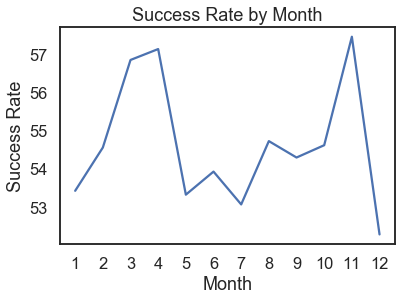

In [30]:
# by month
status_by_month = df.groupby(['month', 'status']).updates.count().reset_index()

# filter only successful and failed
filtered_status_by_month = status_by_month[status_by_month.status.isin(['successful', 'failed'])]
# display(filtered_status_by_month.head())

pivoted_status_by_month = filtered_status_by_month.pivot(\
                                                        columns='status',
                                                        index='month',
                                                        values='updates').reset_index()

pivoted_status_by_month['success_rate'] = 100.0*pivoted_status_by_month.successful/(pivoted_status_by_month.successful+pivoted_status_by_month.failed)
pivoted_status_by_month.sort_values(by='month', inplace=True)
# display(pivoted_status_by_month)

plt.plot(pivoted_status_by_month.month, pivoted_status_by_month.success_rate)
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.title('Success Rate by Month')
plt.show()

#### Is there any relationship between number of rewards and funded percentage?

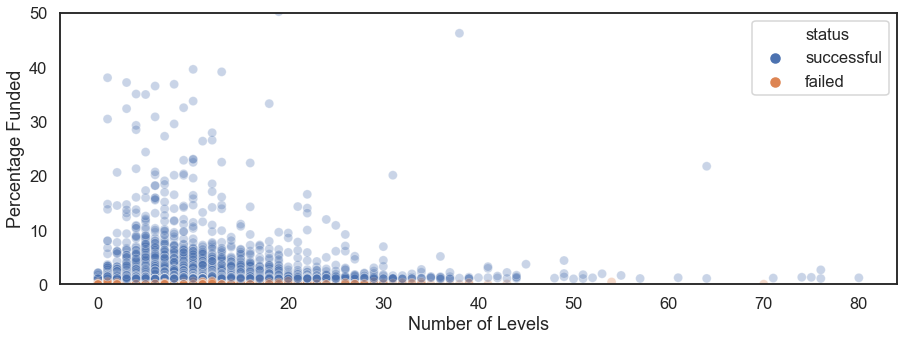

In [31]:
plt.figure(figsize=(15,5))
sns.set_context('talk')
sns.set_style('white')
sns.scatterplot(data=df_successful_failed, x='levels', y='funded percentage', hue='status', alpha=.3)
plt.ylim(0,50)
plt.xlabel('Number of Levels')
plt.ylabel('Percentage Funded')
plt.show()

The scatterplot above suggests that there is no direct relationship between number of levels and percentage funded.

#### Is there a strong correlation between any variable and funded percentage?

In [32]:
df.corr()['funded percentage'].sort_values()

status_code         -0.016826
year                -0.011659
hour                -0.006326
project id          -0.004456
duration            -0.003164
goal                -0.001022
levels               0.000213
comments             0.004800
backers              0.005466
day                  0.005981
month                0.007980
pledged              0.008401
updates              0.015239
funded percentage    1.000000
Name: funded percentage, dtype: float64

There does not seem to be any strong correlation between any variable and funded percentage.

### Create functions that automate analysis

In [39]:
def plot(df, by_what):
        
    df.rename(columns={'updates': 'count'}, inplace=True)
    filtered = df[df.status.isin(['successful', 'failed'])]
    pivoted = filtered.pivot(\
                                                        columns='status',
                                                        index=by_what,
                                                        values='count').reset_index()
    pivoted['success_rate'] = 100.0*pivoted.successful/(pivoted.successful+pivoted.failed)
    pivoted.sort_values(by=by_what, inplace=True)
    plt.plot(pivoted[by_what], pivoted.success_rate)
    plt.xticks(range(df[by_what].nunique()))
    plt.xlabel(by_what)
    plt.ylabel('Success Rate')
    plt.title('Success Rate by {}'.format(by_what))
    plt.show()
    

def subset(filter_by):
    dataset = df[df.category == filter_by]
    display(dataset.head())
    return dataset

def ideal(df):
    dataset_sf = df[df.status.isin(['successful', 'failed'])]
    df = df[df.status == 'successful']
    
    plt.figure(figsize=(8,3.5))
    sns.set()
    sns.set_context('notebook')
    sns.set_style('white')
    
    plt.axvline(df.duration.mean(), color = 'r', linestyle = '--', label = 'mean')
    plt.axvline(df.duration.median(), color = 'g', linestyle = '--', label = 'median')
    
    sns.kdeplot(df.duration)
    plt.xlabel('duration')
    plt.ylabel('density')
    # plt.xticks(range(10,110,10))
    plt.title('Distribution of duration for successful projects')
    plt.show()
    
    print('mean:', df.duration.mean())
    print('median', df.duration.median())
    
# def pledge_goal(df):
    plt.figure(figsize=(8,3.5))
    sns.set()
    sns.set_context('notebook')
    sns.set_style('white')
    
    plt.axvline(df.goal.mean(), color = 'r', linestyle = '--', label = 'mean')
    plt.axvline(df.goal.median(), color = 'g', linestyle = '--', label = 'median')
    
    sns.kdeplot(df.goal)
    plt.xlabel('pledge goal')
    plt.ylabel('density')
    # plt.xticks(range(10,110,10))
    plt.title('Distribution of pledge goal for successful projects')
    plt.show()
    
    print('mean:', df.goal.mean())
    print('median', df.goal.median())
    
    sns.set_context('notebook')
    status_by_month = dataset_sf.groupby(['month', 'status']).updates.count().reset_index()
    plt.xticks(range(1,13))
    plot(status_by_month, 'month')
    plt.xticks(range(1,13))
    
    sns.set_context('notebook')
    status_by_day = dataset_sf.groupby(['day', 'status']).updates.count().reset_index()
    plt.xticks(range(0,7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plot(status_by_day, 'day')
    
    
#     plt.figure(figsize=(10,6))
    sns.set_context('notebook')
    status_by_time = dataset_sf.groupby(['hour', 'status']).updates.count().reset_index()
    # plt.axhline(50, color='red')
    # plt.tick_params()
    plot(status_by_time, 'hour')
    
    
#     subcat = df.groupby('subcategory').name.count().reset_index().sort_values(by='name', ascending=False)
#     subcat.rename(columns={'name': 'count'})
# #     subcat.sort)
#     display(subcat.head())
#     sns.catplot(x='subcategory', y='count', df=subcat)
#     plt.show()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,updates,comments,duration,status_code,day_of_week,month,year,time,hour,day
20,1188601,The Doctor is Out,http://www.kickstarter.com/projects/2074346944...,Theater,Theater,"Austin, TX",failed,4000.0,175.0,0.043750,...,2,0,60.00,1,2011-11-05 00:17:23+00:00,11,2011,00:17:23,0,5
27,1497280,Help DRC create FuturePatrons!,http://www.kickstarter.com/projects/122766416/...,Theater,Theater,"Portland, ME",successful,1500.0,1505.0,1.003333,...,1,0,42.96,0,2012-01-31 20:00:00+00:00,1,2012,20:00:00,20,1
44,2170814,&quot;Braver. Stronger. Smarter.&quot; A New C...,http://www.kickstarter.com/projects/238134214/...,Theater,Theater,"New York, NY",successful,1400.0,1610.0,1.150000,...,0,3,31.95,0,2011-10-13 16:00:00+00:00,10,2011,16:00:00,16,3
66,3463218,INCANTATION a play by Gerene Freeman,http://www.kickstarter.com/projects/1884255073...,Theater,Theater,"New Haven, CT",failed,8000.0,100.0,0.012500,...,0,0,89.56,1,2010-07-12 15:30:00+00:00,7,2010,15:30:00,15,0
78,3797038,DEAR HARVEY (Stories of Harvey Milk)...Educati...,http://www.kickstarter.com/projects/dearharvey...,Theater,Theater,"West Hollywood, CA",failed,2500.0,150.0,0.060000,...,0,0,40.00,1,2010-09-23 00:42:17+00:00,9,2010,00:42:17,0,3


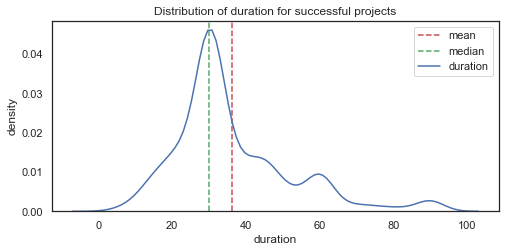

mean: 36.20851400730816
median 30.045


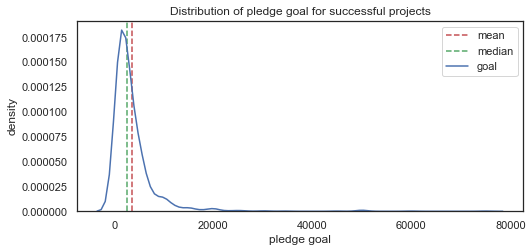

mean: 3643.562667478685
median 2500.0


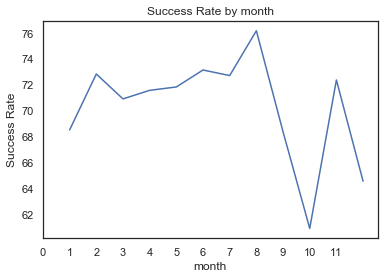

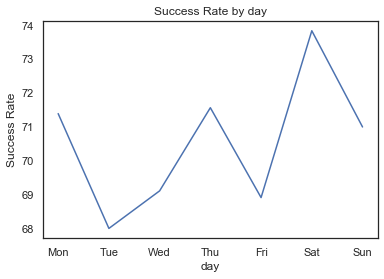

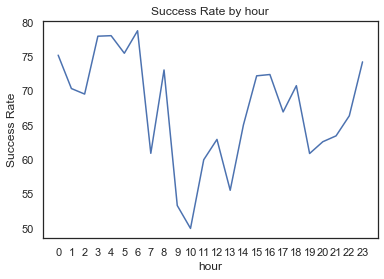

In [40]:
theater = subset('Theater')
ideal(theater)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,updates,comments,duration,status_code,day_of_week,month,year,time,hour,day
8,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",successful,1000.0,1125.0,1.125000,...,10,1,67.53,0,2010-04-18 04:59:00+00:00,4,2010,04:59:00,4,6
12,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Music,Indie Rock,"Ashland, OR",successful,20000.0,20138.0,1.006911,...,8,12,45.04,0,2010-12-10 20:00:07+00:00,12,2010,20:00:07,20,4
22,1253029,Release Sxip Shirey's SONIC NEW YORK,http://www.kickstarter.com/projects/sxipshirey...,Music,Music,"New York, NY",successful,5000.0,6860.0,1.372000,...,28,9,88.19,0,2009-11-26 18:38:00+00:00,11,2009,18:38:00,18,3
32,1664088,Acoustic Soul EP,http://www.kickstarter.com/projects/1959483637...,Music,Music,"Nashville, TN",failed,7000.0,600.0,0.085714,...,0,0,30.00,1,2011-12-11 23:03:08+00:00,12,2011,23:03:08,23,6
33,1708305,Yarn's New Record!,http://www.kickstarter.com/projects/1121368060...,Music,Country & Folk,"Brooklyn, NY",successful,15000.0,20716.0,1.381067,...,1,28,60.04,0,2011-12-30 21:21:04+00:00,12,2011,21:21:04,21,4


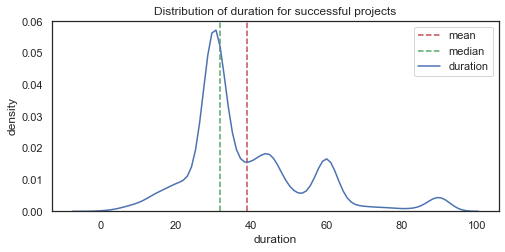

mean: 38.98264870435807
median 31.814999999999998


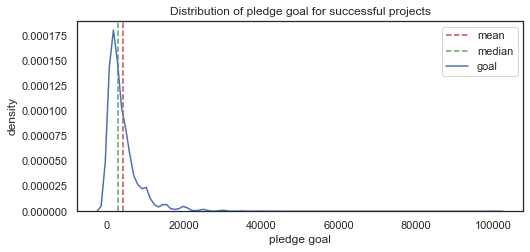

mean: 4181.307701707891
median 2750.0


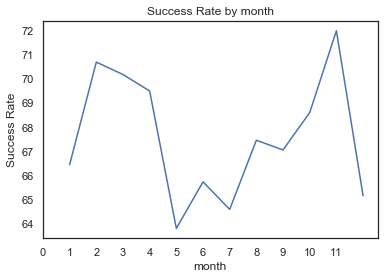

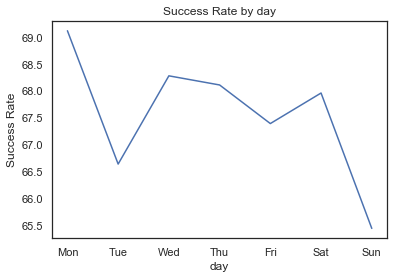

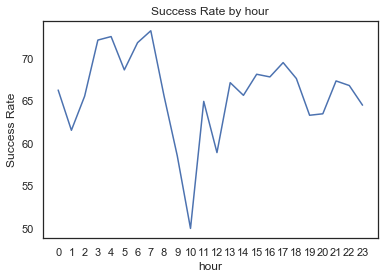

In [41]:
music = subset('Music')
ideal(music)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,updates,comments,duration,status_code,day_of_week,month,year,time,hour,day
13,868003,Adam Barruch Dance: 2011 New York Performances,http://www.kickstarter.com/projects/368421317/...,Dance,Dance,"New York, NY",failed,1500.0,75.0,0.050000,...,0,0,40.04,1,2010-12-05 02:09:39+00:00,12,2010,02:09:39,2,6
38,1968798,Dance Films Kino,http://www.kickstarter.com/projects/945643975/...,Dance,Dance,"Chicago, IL",successful,2500.0,2550.0,1.020000,...,17,3,30.94,0,2012-03-25 21:00:00+00:00,3,2012,21:00:00,21,6
110,5270009,AWAKENED RUINS: a site-specific dance &amp; mu...,http://www.kickstarter.com/projects/lhdanceco/...,Dance,Dance,"Philadelphia, PA",successful,800.0,1290.0,1.612500,...,2,0,58.55,0,2011-09-30 15:59:00+00:00,9,2011,15:59:00,15,4
247,11700967,Subject Matter,http://www.kickstarter.com/projects/340722709/...,Dance,Dance,"New York, NY",successful,5000.0,5300.0,1.060000,...,3,3,29.96,0,2012-03-11 11:23:22+00:00,3,2012,11:23:22,11,6
427,19374863,Bare Bait Dance premieres &quot;Views from Gra...,http://www.kickstarter.com/projects/1140192719...,Dance,Dance,"Missoula, MT",successful,3000.0,3842.0,1.280667,...,1,3,29.00,0,2012-03-01 18:35:31+00:00,3,2012,18:35:31,18,3


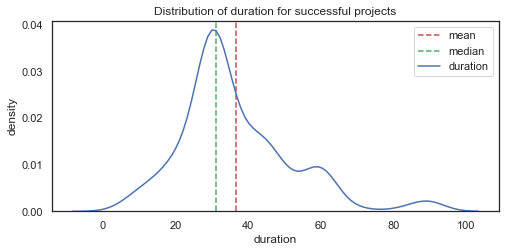

mean: 36.60148007590132
median 31.23


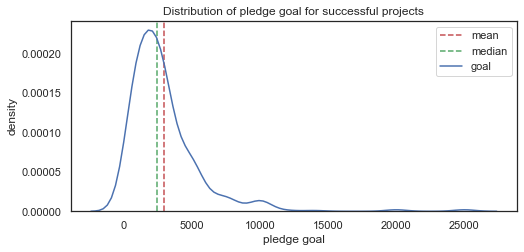

mean: 3011.104573055028
median 2500.0


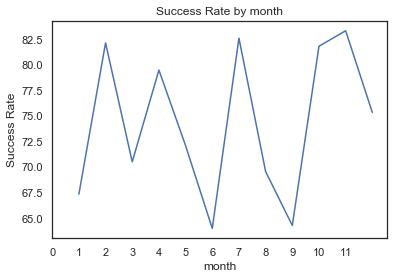

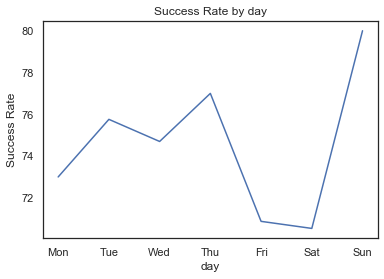

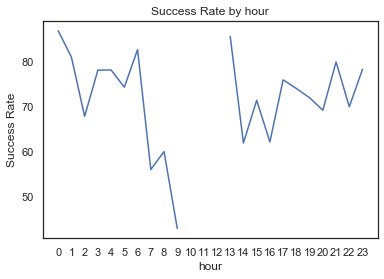

In [42]:
dance = subset('Dance')
ideal(dance)